## Modelagem



### Importando as bibliotecas 

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb

### Base de dados

In [2]:
info_clientes = pd.read_excel("data/informações_clientes.xlsx")

In [6]:
info_clientes

,Unnamed: 0,cliente_id_unico,valor_total,qnt_pedidos
0,0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1
2,2,0000f46a3911fa3c0805444483337064,86.22,1
3,3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1
4,4,0004aac84e0df4da2b147fca70cf8255,196.89,1
...,...,...,...,...
94978,94978,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1
94979,94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1
94980,94980,ffff371b4d645b6ecea244b27531430a,112.46,1
94981,94981,ffff5962728ec6157033ef9805bacc48,133.69,1


In [7]:
features = info_clientes[["valor_total", "qnt_pedidos"]]

In [8]:
features

,valor_total,qnt_pedidos
0,141.90,1
1,27.19,1
2,86.22,1
3,43.62,1
4,196.89,1
...,...,...
94978,2067.42,1
94979,84.58,1
94980,112.46,1
94981,133.69,1


### Padronização de dados 


Objetivo é transformar todas as variáveis na **mesma ordem de grandeza**. Padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1

$$z  = \frac {{x} - {u}} {\sigma}$$




In [9]:
standard_scaler = StandardScaler()
features_scaled = standard_scaler.fit_transform(features)

In [10]:
features_scaled

array([[-0.1048263 , -0.16061265],
       [-0.61076899, -0.16061265],
       [-0.35040985, -0.16061265],
       ...,
       [-0.23467507, -0.16061265],
       [-0.14103752, -0.16061265],
       [-0.4150696 , -0.16061265]])

### Clusterização de dados K-means 
essa célula demora um pouco para rodar mesmo não se assuste!

In [11]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss
wcss = calculate_wcss(features_scaled)

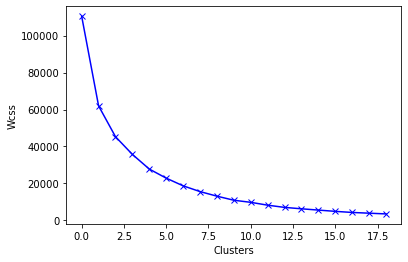

In [13]:
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Wcss')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features_scaled)

KMeans(n_clusters=4)

In [20]:
info_clientes["cluster"] = kmeans.labels_

In [24]:
info_clientes

,Unnamed: 0,cliente_id_unico,valor_total,qnt_pedidos,cluster
0,0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,0
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,0
2,2,0000f46a3911fa3c0805444483337064,86.22,1,0
3,3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,0
4,4,0004aac84e0df4da2b147fca70cf8255,196.89,1,0
...,...,...,...,...,...
94978,94978,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,1
94979,94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,0
94980,94980,ffff371b4d645b6ecea244b27531430a,112.46,1,0
94981,94981,ffff5962728ec6157033ef9805bacc48,133.69,1,0


### Visualizando

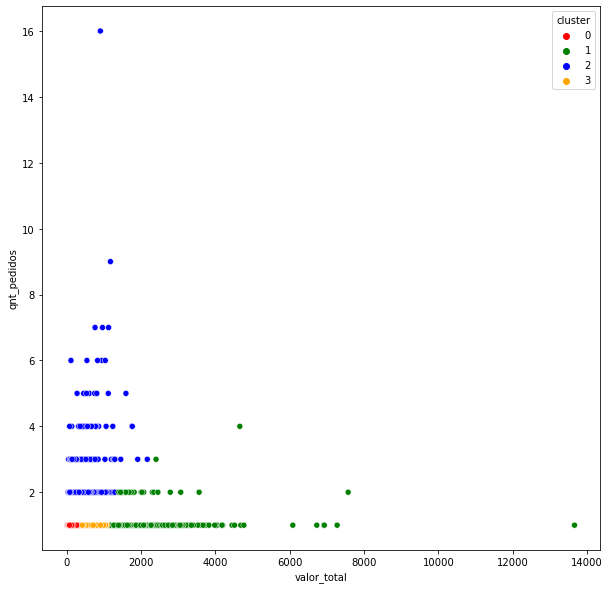

In [29]:
plt.figure(figsize = (10,10))
ax = sb.scatterplot(x= "valor_total", y="qnt_pedidos", hue="cluster", data=info_clientes,
                    palette = ['red', 'green', 'blue', 'orange'])
plt.show()

In [30]:
info_clientes.to_excel("./data/cluster_clientes.xlsx")